# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [ ]:
import pandas as pd
import numpy as np
import os
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fire/forestfires.csv', header = 0, names = columns))


# Get X and Y

Create the features data frame and target data.

In [161]:
from sklearn.model_selection import train_test_split
X = fires_dt.drop(columns='area')
Y = fires_dt[['area']]
Y = np.ravel(Y.values)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=42)



# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [ ]:
# preproc1
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

numerical_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day']
print(numerical_features)
print(categorical_features)

p1_num = Pipeline([
    ('imputer', KNNImputer(n_neighbors=7,weights='distance')),
    ('standardizer',StandardScaler())
])
p1_cat = Pipeline([
    ('simple_imputer',SimpleImputer(strategy='most_frequent')),
    ('Onehot', OneHotEncoder(handle_unknown='ignore'))
])
preproc1 = ColumnTransformer(
    transformers=[
        ('num_t', p1_num,numerical_features),
        ('cat_t', p1_cat, categorical_features)
    ]
)

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [ ]:
# preproc2
def log_t(x):
    x_nonzero = np.where(x <= 0, 1e-6, x)
    return np.log1p(x_nonzero)

p2_num = Pipeline([
    ('imputer', KNNImputer(n_neighbors=7,weights='distance')),
    ('standardizer',StandardScaler()),
    ('log', FunctionTransformer(log_t))
])
p2_cat = Pipeline([
    ('simple_imputer',SimpleImputer(strategy='most_frequent')),
    ('Onehot', OneHotEncoder(handle_unknown='ignore'))
])
preproc2 = ColumnTransformer(
    transformers=[
        ('num_t', p2_num,numerical_features),
        ('cat_t', p2_cat, categorical_features)
    ]
)
preproc2

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [ ]:
# Pipeline A = preproc1 + baseline
from sklearn.linear_model import LinearRegression
PipeA = Pipeline([
    ('preproceed 1', preproc1),
    ('linear regression', LinearRegression())
])


In [ ]:
# Pipeline B = preproc2 + baseline
PipeB = Pipeline([
    ('preproceed 2', preproc2),
    ('linear regression', LinearRegression())
])


In [154]:
# Pipeline C = preproc1 + advanced model
from sklearn.ensemble import RandomForestRegressor

PipeC = Pipeline([
    ('preproceed1', preproc1),
    ('advanced regression', RandomForestRegressor())
])


In [155]:
# Pipeline D = preproc2 + advanced model
PipeD = Pipeline([
    ('preproceed1', preproc2),
    ('advanced regression', RandomForestRegressor())
])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [176]:
PipeA.get_params()

{'memory': None,
 'steps': [('preproceed 1',
   ColumnTransformer(transformers=[('num_t',
                                    Pipeline(steps=[('imputer',
                                                     KNNImputer(n_neighbors=7,
                                                                weights='distance')),
                                                    ('standardizer',
                                                     StandardScaler())]),
                                    ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                     'isi', 'temp', 'rh', 'wind', 'rain']),
                                   ('cat_t',
                                    Pipeline(steps=[('simple_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('Onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
            

In [177]:
from sklearn.model_selection import GridSearchCV
paramater_lr_grid = {'linear regression__fit_intercept': [True, False],
                     'linear regression__n_jobs': [None,1,2,5],
                     'linear regression__positive': [False,True]
                     }

scoring='neg_mean_squared_error'

Grid_A = GridSearchCV(PipeA, param_grid=paramater_lr_grid, cv=5, scoring=scoring,refit='neg_log_loss')
Grid_A.fit(X,Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproceed 1',
                                        ColumnTransformer(transformers=[('num_t',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights='distance')),
                                                                                         ('standardizer',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat_t',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('linear regression',
                                        LinearRegression())]),
             param_grid={'linear regression__fit_intercept': [True, False],
                         'linear regression__n_jobs': [None, 1, 2, 5],
                         'linear regression__positive': [False, True]},
             refit='neg_log_loss', scoring='neg_mean_squared_error')

In [178]:
Grid_B = GridSearchCV(PipeB, param_grid=paramater_lr_grid, cv=5, scoring=scoring)
Grid_B.fit(X,Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproceed 2',
                                        ColumnTransformer(transformers=[('num_t',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights='distance')),
                                                                                         ('standardizer',
                                                                                          StandardScaler()),
                                                                                         ('log',
                                                                                          FunctionTransformer(func=<function log_t at 0x000001BE2192E160>))]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']...
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('linear regression',
                                        LinearRegression())]),
             param_grid={'linear regression__fit_intercept': [True, False],
                         'linear regression__n_jobs': [None, 1, 2, 5],
                         'linear regression__positive': [False, True]},
             scoring='neg_mean_squared_error')

In [169]:
paramater_rf_grid = {
    'advanced regression__n_estimators': [50, 100, 200],
    'advanced regression__max_features': [None, 'sqrt', 'log2', 0.5, .075],
    'advanced regression__min_samples_leaf': [1,2,5],
}
Grid_C = GridSearchCV(PipeC, param_grid=paramater_rf_grid, cv=5, scoring=scoring)
Grid_C.fit(X,Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproceed1',
                                        ColumnTransformer(transformers=[('num_t',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights='distance')),
                                                                                         ('standardizer',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat_t',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('advanced regression',
                                        RandomForestRegressor())]),
             param_grid={'advanced regression__max_features': [None, 'sqrt',
                                                               'log2', 0.5,
                                                               0.075],
                         'advanced regression__min_samples_leaf': [1, 2, 5],
                         'advanced regression__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [170]:
Grid_D = GridSearchCV(PipeD, param_grid=paramater_rf_grid, cv=5, scoring=scoring)
Grid_D.fit(X,Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproceed1',
                                        ColumnTransformer(transformers=[('num_t',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights='distance')),
                                                                                         ('standardizer',
                                                                                          StandardScaler()),
                                                                                         ('log',
                                                                                          FunctionTransformer(func=<function log_t at 0x000001BE2192E160>))]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('advanced regression',
                                        RandomForestRegressor())]),
             param_grid={'advanced regression__max_features': [None, 'sqrt',
                                                               'log2', 0.5,
                                                               0.075],
                         'advanced regression__min_samples_leaf': [1, 2, 5],
                         'advanced regression__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

# Evaluate

+ Which model has the best performance?

In [179]:
print("Best score for Pipeline A:", -Grid_A.best_score_)
print("Best score for Pipeline B:", -Grid_B.best_score_)
print("Best score for Pipeline C:", -Grid_C.best_score_)
print("Best score for Pipeline D:", -Grid_D.best_score_)

Best score for Pipeline A: 4303.305237658366
Best score for Pipeline B: 4235.234811838719
Best score for Pipeline C: 4178.26025247137
Best score for Pipeline D: 4190.866220758382


# Export

+ Save the best performing model to a pickle file.

In [180]:
import pickle
best_model = Grid_A.best_estimator_

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    Ans - DMC (Duff Moisture Code) is the most important feature for predicting the varsity of forest fire as it has the highest SHAP value meaning more likely for forest fire to impact a larger area

    - In general, across the complete training set, which features are the most and least important.

    Ans - DMC, DC are the most important and the least important features are the days of the week.  

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

    ANS -   1. Remove the identified features from the dataset. 
            2. Re-train the model without these features. (Drop features in the X --> X_reduced)
            3. Evaluate the model performance on the test set. 
            4. Compare the performance metrics with the original model.

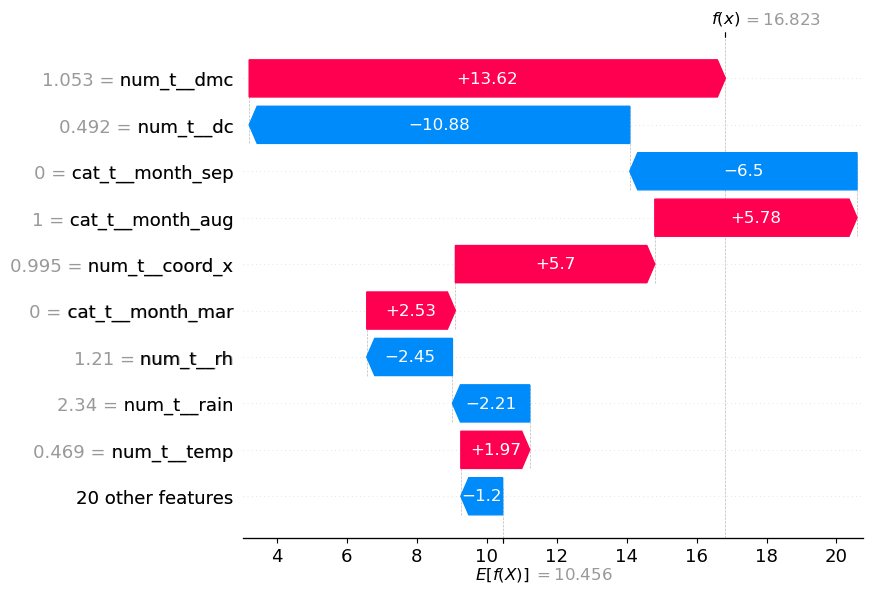

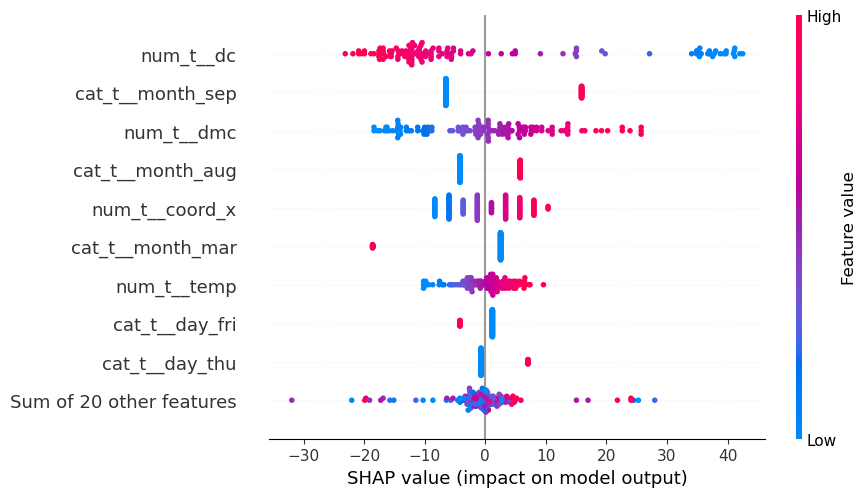

   num_t__coord_x  num_t__coord_y  num_t__ffmc  num_t__dmc  num_t__dc  \
0        3.365157       -0.248905     0.455016  -13.975972  34.079895   
1        5.702072       -0.248905    -0.382811   13.615179 -10.881687   
2        8.038986       -0.563974    -0.078146   18.282787 -10.994615   
3        1.028242        0.066165    -0.245712   -3.685608 -12.583677   
4       -5.982501        0.066165    -0.260945    6.100149 -12.325555   

   num_t__isi  num_t__temp  num_t__rh  num_t__wind  num_t__rain  ...  \
0    1.513360    -5.389627  -5.571340     0.805901     0.062515  ...   
1   -1.214781     1.970908  -2.450443     0.805901    -2.210745  ...   
2    0.326114     4.757907   1.423775    -2.344531     0.062515  ...   
3   -1.618950     0.898986  -0.513334     0.805901     0.062515  ...   
4   -2.654633     7.401983   1.316158     0.805901     0.062515  ...   

   cat_t__month_nov  cat_t__month_oct  cat_t__month_sep  cat_t__day_fri  \
0              -0.0         -0.488411         -6.4972

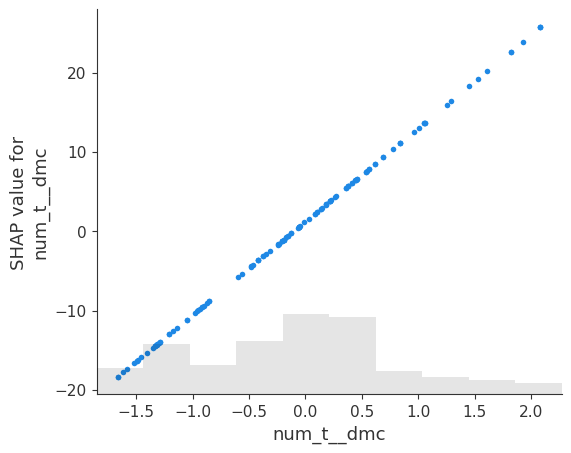

In [212]:
import shap
import matplotlib.pyplot as plt 

import shap

data_transform = PipeA.named_steps['preproceed 1'].transform(X_test)

explainer = shap.explainers.Linear(
    PipeA.named_steps['linear regression'], 
    data_transform,
    feature_names=PipeA.named_steps['preproceed 1'].get_feature_names_out() 
)

# Calculate SHAP values
shap_values = explainer(data_transform)

# Plot waterfall plot for a specific observation (e.g., the second instance in X_test)
shap.plots.waterfall(shap_values[1])  

shap.plots.beeswarm(shap_values)

shap_values_df = pd.DataFrame(shap_values.values, columns=PipeA.named_steps['preproceed 1'].get_feature_names_out())

# Print the head of the SHAP values DataFrame
print(shap_values_df.head())
shap.plots.scatter(shap_values[:,'num_t__dmc'])


*(Answer here.)*

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.